In [15]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm
import jax.numpy as jnp
from jax import grad

In [4]:
def f(x):
    return np.exp(-np.dot(x.T, x)) * x

In [2]:
def compute_partial_derivatives(x, p_values):
    derivatives = []
    for p in p_values:
        alpha = 10 ** p
        derivative = []
        for j in range(len(x)):
            x_plus_alpha = np.array(x, dtype=float)
            x_plus_alpha[j] += alpha
            derivative.append((f(x_plus_alpha) - f(x)) / alpha)
        derivatives.append(derivative)
    return derivatives

In [3]:
def compute_complex_step_derivatives(x, p_values):
    derivatives = []
    for p in p_values:
        epsilon = 10 ** p
        derivative = []
        for j in range(len(x)):
            x_complex = np.array(x, dtype=complex)
            x_complex[j] += 1j * epsilon
            derivative.append(np.imag(f(x_complex)) / epsilon)
        derivatives.append(derivative)
    return derivatives

In [18]:
def f_jax(x):
    return jnp.sum(jnp.exp(-jnp.dot(x.T, x)) * x)

def compute_auto_derivatives(x, p_values):
    derivatives = []
    x_jax = jnp.array(x) 
    grad_f = grad(f_jax)
    
    gradient_at_x = grad_f(x_jax)
    
    for p in p_values:
        alpha = 10 ** p
        derivative = []
        for j in range(len(x)):
            partial_derivative = gradient_at_x[j]
            derivative.append(partial_derivative)
        derivatives.append(derivative)
    return derivatives

# 1

In [5]:
x0 = np.ones(1)
p_values = range(-300, 1)

1.1

In [6]:
partial_derivatives = compute_partial_derivatives(x0, p_values)
partial_derivatives_plot = []
for i, p in enumerate(p_values):
    print(f"p = {p}, оценка частных производных: {partial_derivatives[i]}")
    partial_derivatives_plot.append(float(partial_derivatives[i][0]))

p = -300, оценка частных производных: [array([0.])]
p = -299, оценка частных производных: [array([0.])]
p = -298, оценка частных производных: [array([0.])]
p = -297, оценка частных производных: [array([0.])]
p = -296, оценка частных производных: [array([0.])]
p = -295, оценка частных производных: [array([0.])]
p = -294, оценка частных производных: [array([0.])]
p = -293, оценка частных производных: [array([0.])]
p = -292, оценка частных производных: [array([0.])]
p = -291, оценка частных производных: [array([0.])]
p = -290, оценка частных производных: [array([0.])]
p = -289, оценка частных производных: [array([0.])]
p = -288, оценка частных производных: [array([0.])]
p = -287, оценка частных производных: [array([0.])]
p = -286, оценка частных производных: [array([0.])]
p = -285, оценка частных производных: [array([0.])]
p = -284, оценка частных производных: [array([0.])]
p = -283, оценка частных производных: [array([0.])]
p = -282, оценка частных производных: [array([0.])]
p = -281, оц

/tmp/ipykernel_165/1988778411.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  partial_derivatives_plot.append(float(partial_derivatives[i][0]))


1.2

In [7]:
complex_step_derivatives = compute_complex_step_derivatives(x0, p_values)
complex_step_derivatives_plot = []
for i, p in enumerate(p_values):
    print(f"p = {p}, оценка частных производных: {complex_step_derivatives[i]}")
    complex_step_derivatives_plot.append(float(complex_step_derivatives[i][0]))

p = -300, оценка частных производных: [array([-0.36787944])]
p = -299, оценка частных производных: [array([-0.36787944])]
p = -298, оценка частных производных: [array([-0.36787944])]
p = -297, оценка частных производных: [array([-0.36787944])]
p = -296, оценка частных производных: [array([-0.36787944])]
p = -295, оценка частных производных: [array([-0.36787944])]
p = -294, оценка частных производных: [array([-0.36787944])]
p = -293, оценка частных производных: [array([-0.36787944])]
p = -292, оценка частных производных: [array([-0.36787944])]
p = -291, оценка частных производных: [array([-0.36787944])]
p = -290, оценка частных производных: [array([-0.36787944])]
p = -289, оценка частных производных: [array([-0.36787944])]
p = -288, оценка частных производных: [array([-0.36787944])]
p = -287, оценка частных производных: [array([-0.36787944])]
p = -286, оценка частных производных: [array([-0.36787944])]
p = -285, оценка частных производных: [array([-0.36787944])]
p = -284, оценка частных

/tmp/ipykernel_165/2701016439.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  complex_step_derivatives_plot.append(float(complex_step_derivatives[i][0]))


1.3

In [19]:
x0 = jnp.ones(1) 

auto_derivatives = compute_auto_derivatives(x0, p_values)
auto_derivatives_plot = []
for i, p in enumerate(p_values):
    print(f"p = {p}, оценка частных производных: {auto_derivatives[i]}")
    auto_derivatives_plot.append(float(auto_derivatives[i][0]))

p = -300, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -299, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -298, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -297, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -296, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -295, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -294, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -293, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -292, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -291, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -290, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -289, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -288, оценка частных производных: [Array(-0.36787945, dtype=float32)]
p = -287, оценка частных производных: 

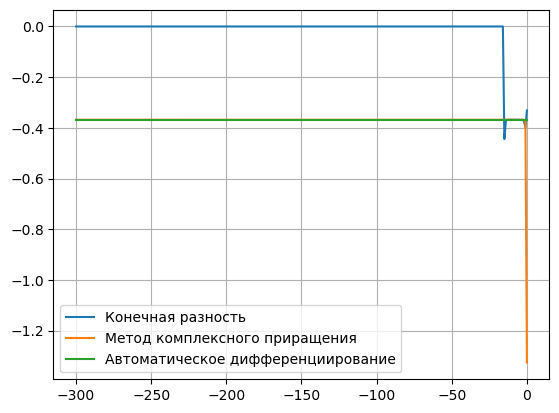

In [20]:
plt.plot(p_values, partial_derivatives_plot, label='Конечная разность')
plt.plot(p_values, complex_step_derivatives_plot, label='Метод комплексного приращения')
plt.plot(p_values, auto_derivatives_plot, label='Автоматическое дифференциирование')
plt.legend()
plt.grid()
plt.show()

In [80]:
def gradient_f(x):
    n = len(x)
    exp_term = np.exp(-np.dot(x.T, x))
    grad = np.zeros(n)
    
    for i in range(n):
        d_term = -2 * x[i] * exp_term * x + exp_term
        grad[i] = d_term[i]
    
    return grad

percent_error = 0.001
x0 = np.ones(5)
upper_x = percent_error * np.abs(x0)

grad = gradient_f(x0)
upper_f = np.abs(grad) @ upper_x

print(f"Градиент в точке x0: {grad}")
print(f"Оценка погрешности значения функции f: {upper_f}")

Градиент в точке x0: [-0.00673795 -0.00673795 -0.00673795 -0.00673795 -0.00673795]
Оценка погрешности значения функции f: 3.3689734995427336e-05


# 2

In [128]:
import numpy as np

class Interval:
    def __init__(self, lower, upper):
        self.lower = lower
        self.upper = upper

    def __add__(self, other):
        return Interval(self.lower + other.lower, self.upper + other.upper)

    def __sub__(self, other):
        return Interval(self.lower - other.upper, self.upper - other.lower)

    def __mul__(self, other):
        if not isinstance(other, Interval):
            raise ValueError("Multiplication is only supported between Interval objects.")
        
        lower_bound = np.minimum(
            np.minimum(self.lower * other.lower, self.lower * other.upper),
            np.minimum(self.upper * other.lower, self.upper * other.upper)
        )
        
        upper_bound = np.maximum(
            np.maximum(self.lower * other.lower, self.lower * other.upper),
            np.maximum(self.upper * other.lower, self.upper * other.upper)
        )
        
        return Interval(lower_bound, upper_bound)

    def __repr__(self):
        return f"[{self.lower}, {self.upper}]"

class Affine:
    def __init__(self, center, delta):
        self.center = center
        self.delta = delta

    def __add__(self, other):
        return Affine(self.center + other.center, self.delta + other.delta)

    def __sub__(self, other):
        return Affine(self.center - other.center, self.delta + other.delta)

    def __mul__(self, scalar):
        return Affine(self.center * scalar, np.abs(self.delta * scalar))

    def __repr__(self):
        return f"Center: {self.center}, Delta: {self.delta}"

def f_interval(x):
    exp_term_lower = np.exp((interval_x * interval_x).lower)s
    exp_term_upper = np.exp((interval_x * interval_x).upper)
    f_lower = exp_term_lower * x.lower
    f_upper = exp_term_upper * x.upper
    return Interval(f_lower, f_upper)

def f_affine(x):
    exp_term = np.exp(-np.dot(x.center, x.center))
    f_center = exp_term * x.center
    f_delta = exp_term * x.delta
    return Affine(f_center, f_delta)

percent_error = 0.01
x0 = np.ones(1)
delta_x = percent_error * np.ones(3)

# Интервальная арифметика
interval_x = Interval(x0 - delta_x, x0 + delta_x)
interval_result = f_interval(interval_x)


# Аффинная арифметика
affine_x = Affine(x0, delta_x)
affine_result = f_affine(affine_x)

# Оценка погрешности
interval_error = (interval_result.upper - interval_result.lower) / 2
affine_error = np.linalg.norm(affine_result.delta)

print(f"Интервальная арифметика результат: {interval_result}, Погрешность: {interval_error}")
print(f"Аффинная арифметика результат: {affine_result}, Погрешность: {affine_error}")

Интервальная арифметика результат: [[2.63807547 2.63807547 2.63807547], [2.80120682 2.80120682 2.80120682]], Погрешность: [0.08156567 0.08156567 0.08156567]
Аффинная арифметика результат: Center: [0.36787944], Delta: [0.00367879 0.00367879 0.00367879], Погрешность: 0.0063718588316898405
